In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv('mcdonalds.csv')

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
categ_cols=data.select_dtypes(include='object')

In [11]:
categ_cols

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,Every three months,Male


In [12]:
num_cols=data.select_dtypes(exclude='object')

In [13]:
num_cols

,Age
0,61
1,51
2,62
3,69
4,49
...,...
1448,47
1449,36
1450,52
1451,41


In [14]:
categ_cols=categ_cols.columns

In [15]:
categ_cols

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency',
       'Gender'],
      dtype='object')

In [16]:
for i in categ_cols:
    print(i,data[i].value_counts())

yummy yummy
Yes    803
No     650
Name: count, dtype: int64
convenient convenient
Yes    1319
No      134
Name: count, dtype: int64
spicy spicy
No     1317
Yes     136
Name: count, dtype: int64
fattening fattening
Yes    1260
No      193
Name: count, dtype: int64
greasy greasy
Yes    765
No     688
Name: count, dtype: int64
fast fast
Yes    1308
No      145
Name: count, dtype: int64
cheap cheap
Yes    870
No     583
Name: count, dtype: int64
tasty tasty
Yes    936
No     517
Name: count, dtype: int64
expensive expensive
No     933
Yes    520
Name: count, dtype: int64
healthy healthy
No     1164
Yes     289
Name: count, dtype: int64
disgusting disgusting
No     1100
Yes     353
Name: count, dtype: int64
Like Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64
VisitFrequency VisitFrequency
On

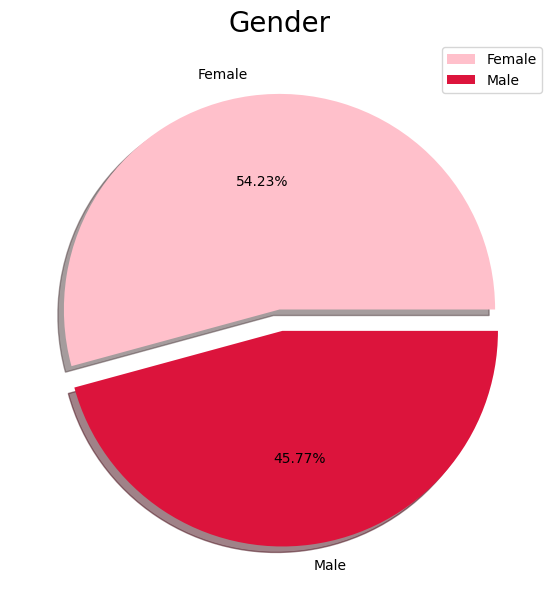

/var/folders/qh/mmgp000n7wnfvgy5dk54hgt40000gn/T/ipykernel_90417/2791896892.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df = sns.countplot(x=data['Age'], palette = 'viridis')


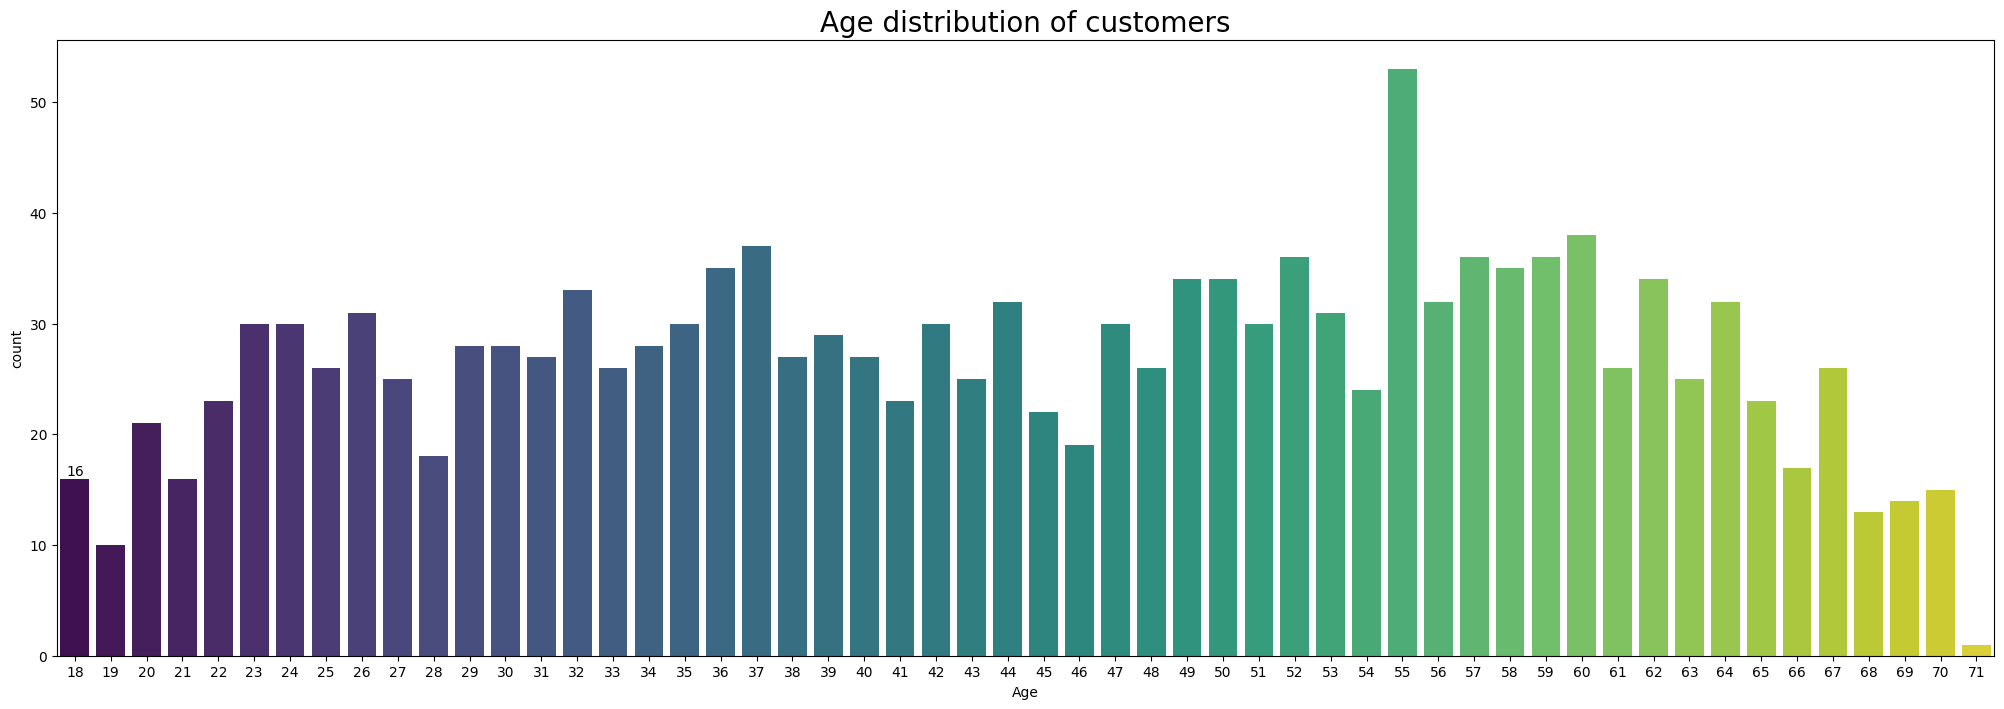

In [17]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
df = sns.countplot(x=data['Age'], palette = 'viridis')
df.bar_label(df.containers[0])
plt.title('Age distribution of customers', fontsize = 20)

plt.show()

In [18]:
datanew = data.drop(columns=['Like','Age','VisitFrequency','Gender']) 

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data_encoded = datanew.apply(lb.fit_transform)

In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(data_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


In [21]:
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [22]:
loadings = pca.components_
num_pc = loadings.shape[0]
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = data_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.406955,-0.282615,0.259588,0.026237,-0.346857,0.124916,-0.159878,-0.016587,0.195341,-0.691446,-0.091851
convenient,0.308827,0.045682,0.317151,-0.009424,0.437148,-0.188966,0.661814,-0.150033,0.336539,-0.028831,0.021460
spicy,0.023320,-0.069982,-0.020170,0.845496,0.185551,-0.438661,-0.214188,0.027835,-0.025239,-0.058187,-0.041960
fattening,-0.177861,0.205590,0.608077,-0.023396,-0.086934,-0.107520,0.023851,0.720478,-0.105052,0.020311,-0.074626
greasy,-0.267796,0.136300,0.389568,0.330854,-0.343713,0.278329,0.307300,-0.487275,-0.346137,0.015160,-0.031047
fast,0.213039,0.282441,0.211395,0.090363,0.568939,0.572734,-0.392436,-0.055976,-0.099235,-0.017917,-0.054448
cheap,0.289134,0.575032,-0.125157,0.114477,-0.256981,-0.020657,0.008895,0.064667,0.062027,-0.060323,0.691923
tasty,0.426115,-0.242199,0.269648,0.072691,-0.286099,0.053053,-0.197364,-0.059289,0.213587,0.713426,0.006426
expensive,-0.290944,-0.567528,0.183298,0.035510,0.207362,0.171160,-0.015198,0.061727,0.009675,-0.029581,0.693614


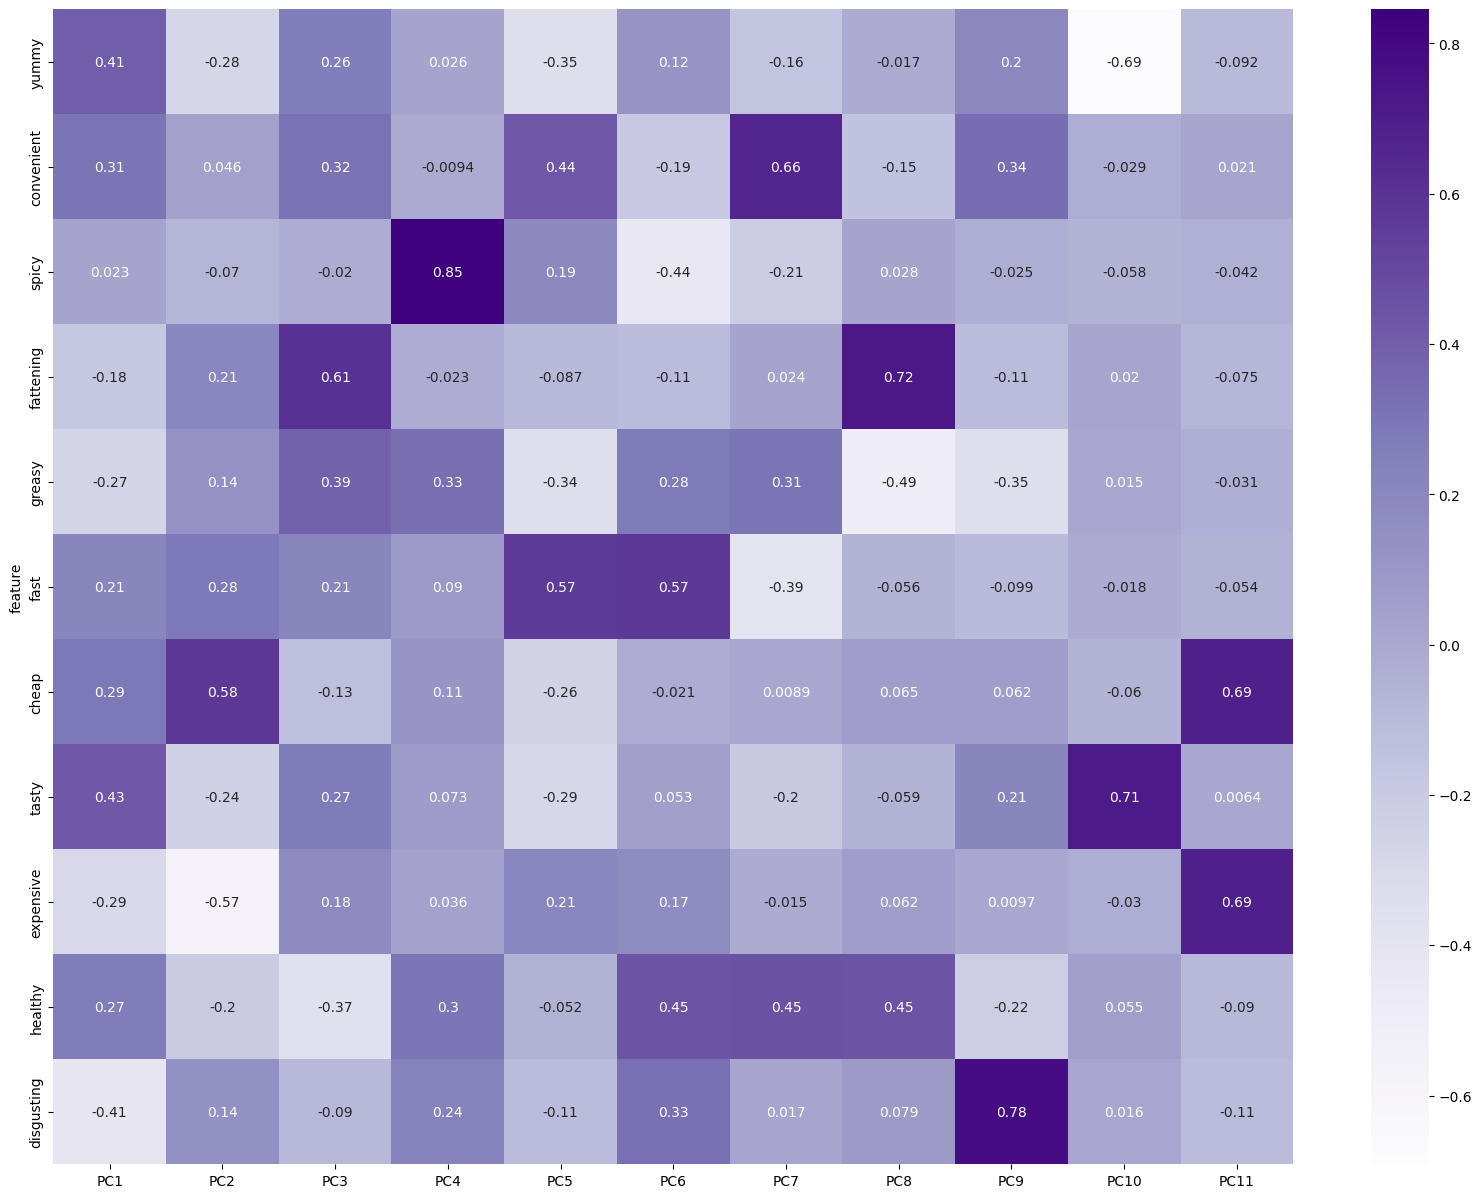

In [23]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()

In [24]:
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans


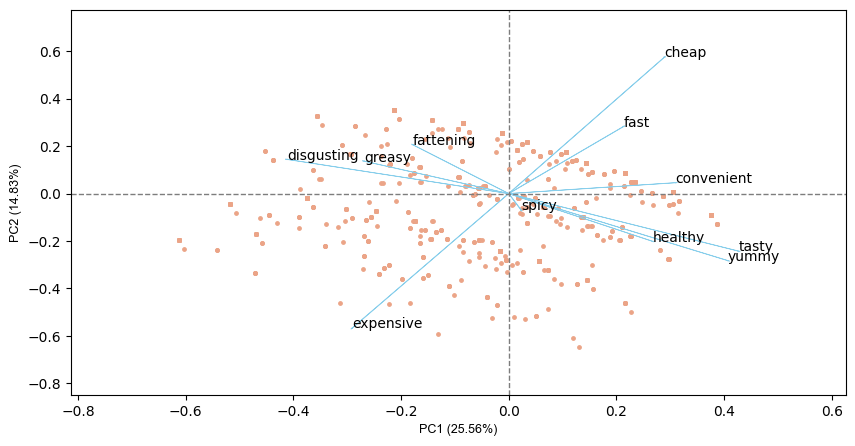

In [27]:
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))
     

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_encoded)
data['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)


Labels: [0 2 1 ... 3 3 1]
WCSS: 1678.1800241005992
No. of iterations:  8
Cluster centroids:  [[6.82593857e-03 8.43003413e-01 6.48464164e-02 9.01023891e-01
  6.00682594e-01 9.28327645e-01 8.43003413e-01 1.02389078e-02
  5.80204778e-02 8.19112628e-02 4.60750853e-01]
 [3.62666667e-01 8.05333333e-01 1.04000000e-01 9.30666667e-01
  7.57333333e-01 7.60000000e-01 1.06666667e-02 4.69333333e-01
  9.86666667e-01 8.00000000e-02 4.29333333e-01]
 [8.03278689e-01 9.83606557e-01 1.21311475e-01 9.73770492e-01
  1.00000000e+00 9.54098361e-01 8.95081967e-01 9.54098361e-01
  1.04918033e-01 1.83606557e-01 1.67213115e-01]
 [8.75000000e-01 9.79166667e-01 8.54166667e-02 7.29166667e-01
  1.11022302e-16 9.58333333e-01 7.20833333e-01 9.70833333e-01
  2.10416667e-01 3.72916667e-01 1.25000000e-02]]


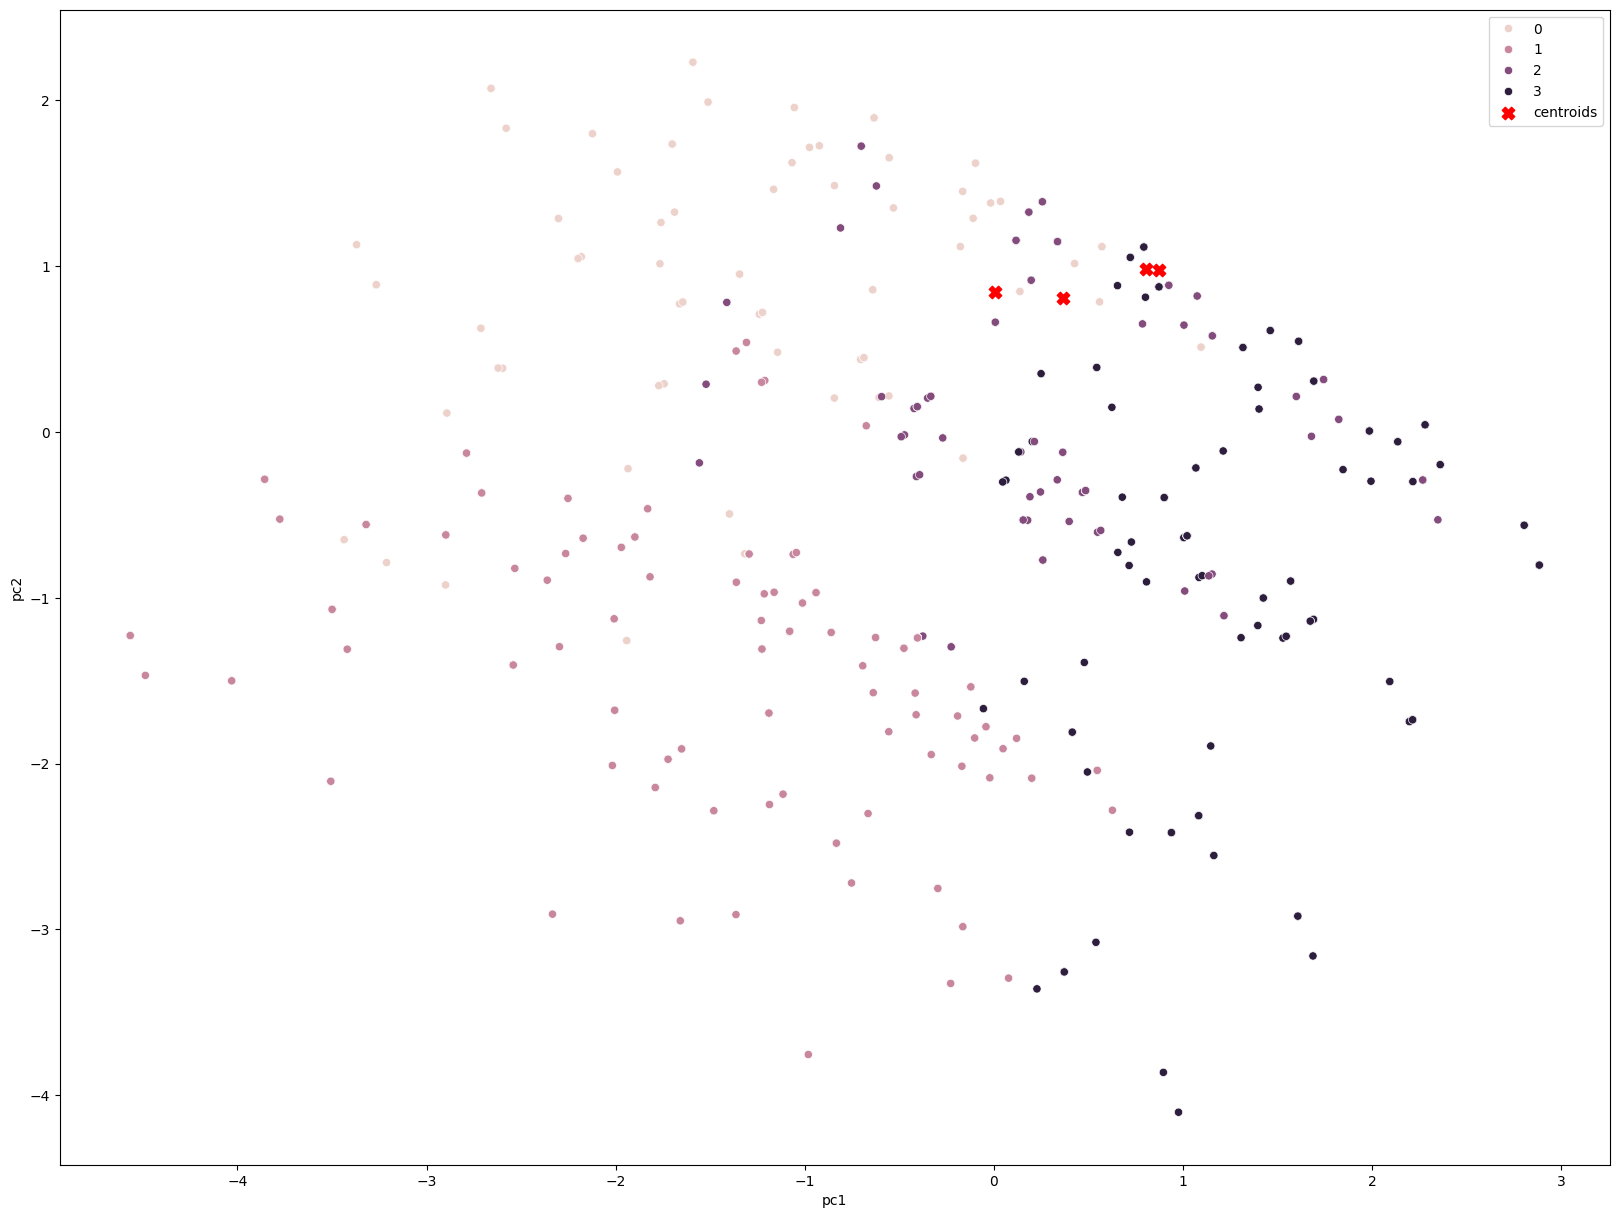

In [31]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

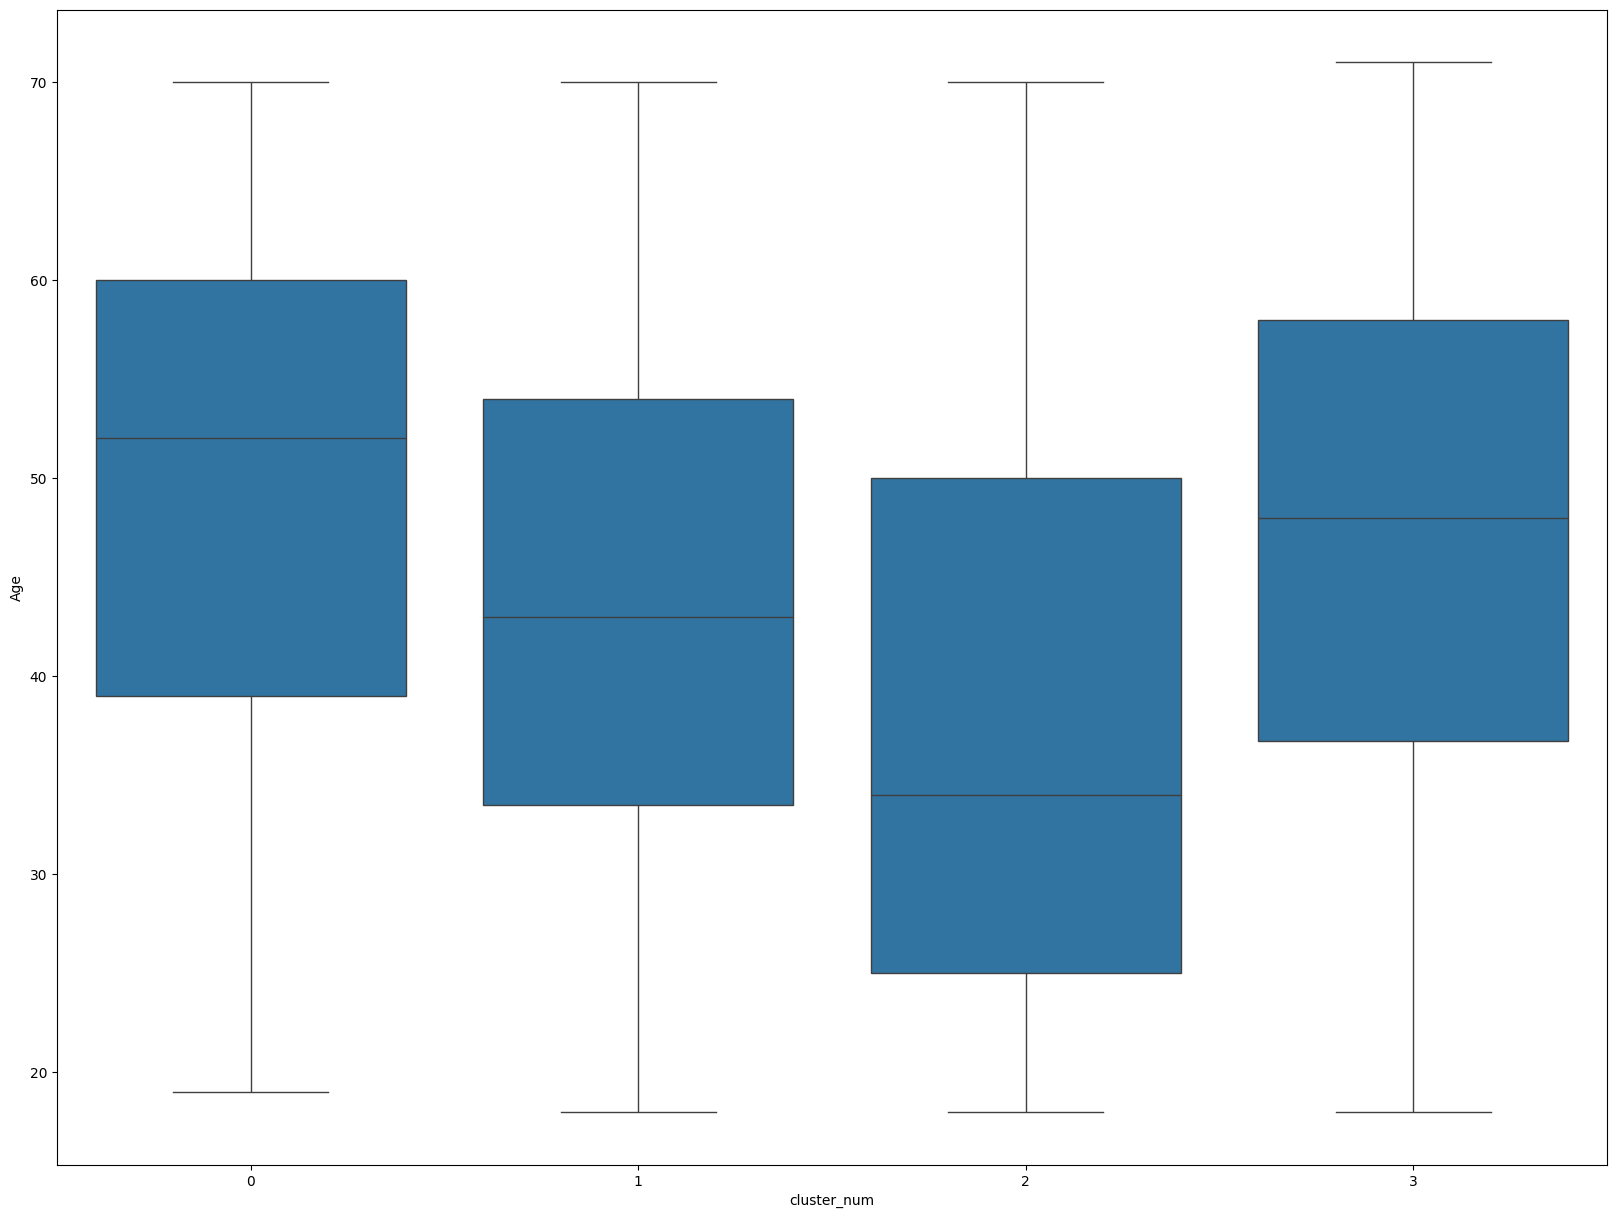

In [35]:
sns.boxplot(x="cluster_num", y="Age", data=data);

In [37]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.802048
1,1,2.597333
2,2,2.632787
3,3,2.572917


In [38]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.959044
1,1,5.245333
2,2,3.855738
3,3,3.850000


In [39]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.433447
1,1,0.568000
2,2,0.416393
3,3,0.412500


In [40]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.433447,5.959044,2.802048
1,1,0.568000,5.245333,2.597333
2,2,0.416393,3.855738,2.632787
3,3,0.412500,3.850000,2.572917


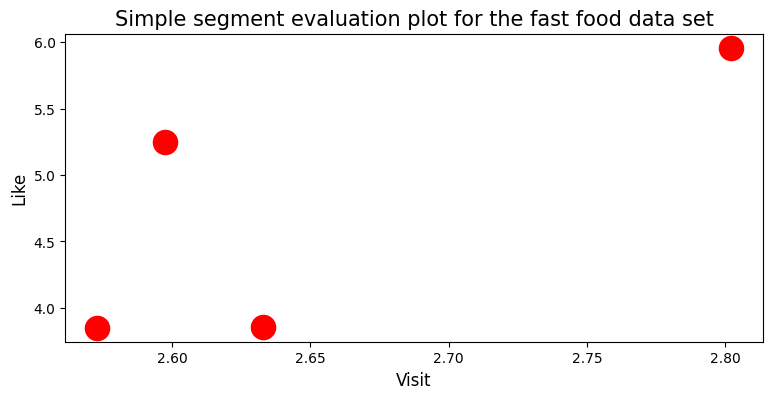

In [41]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()
     